# 强化学习
强化学习的整体思想有点类似控制理论，即通过让agent与enviroment进行交互，使得return最大化。
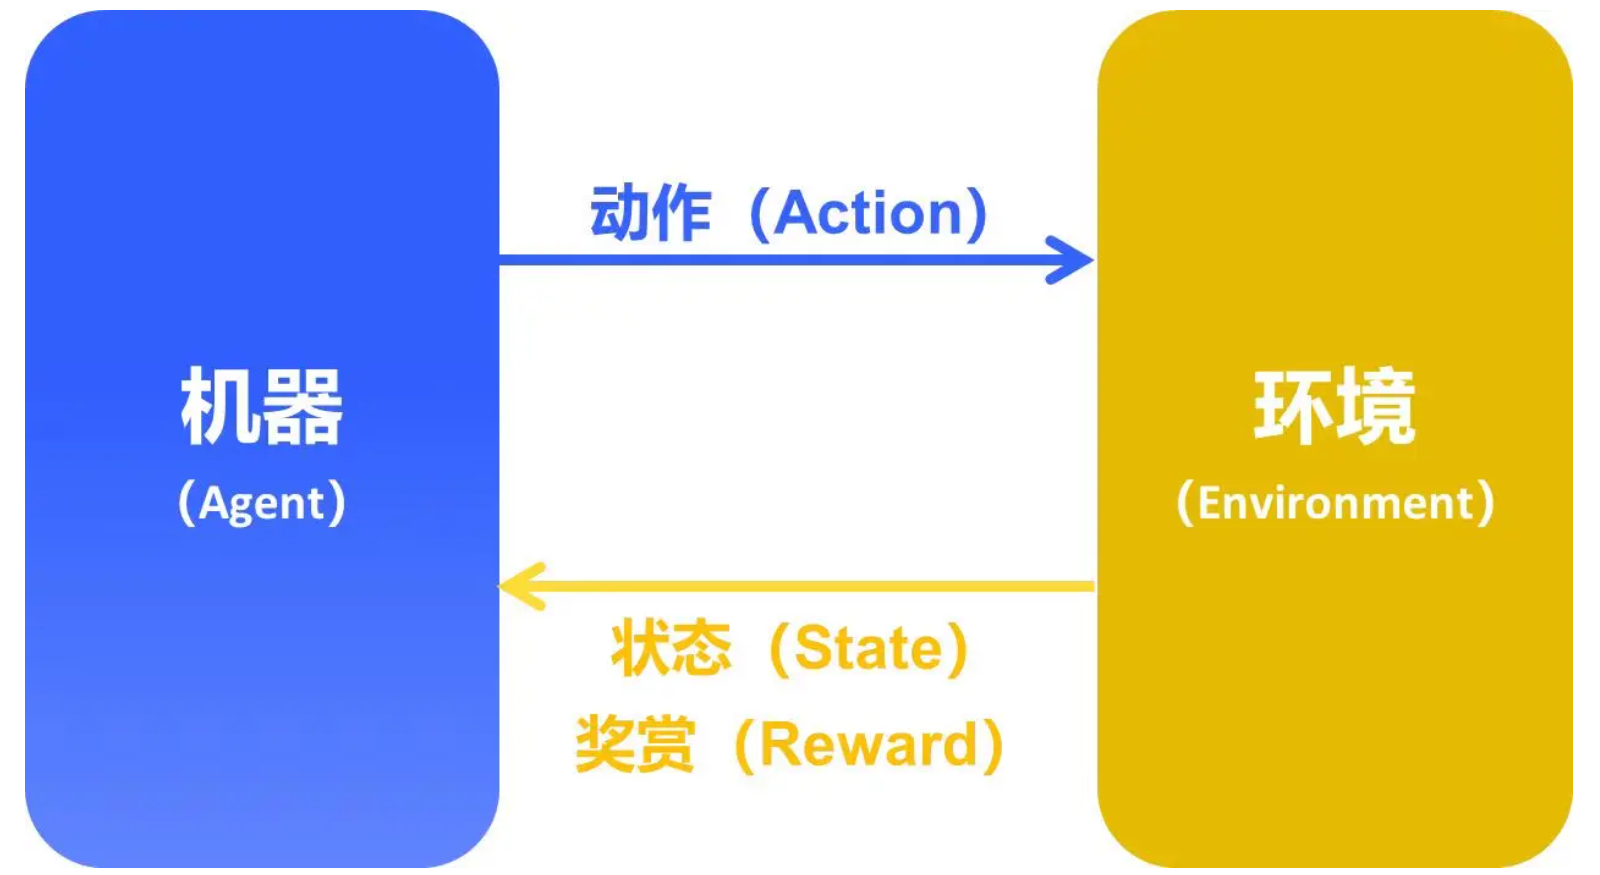    
## 1.基本概念
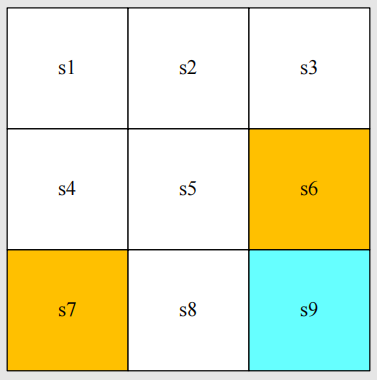    
`State`：agent在环境中说表现出来的状态，即$S_1,S_2,...,S_9$。其可能是个向量，包含多个信息，如位置、速度、加速度等。所有的State组成的集合称为`State Space`,即$S=\{S_1,S_2,...,S_9\}$。    

`Action`：agent在State下可以采取的动作，如上图每个State可以采取的动作有向左、向右、向上、向下、静止这5个Action。所有的Action组成的集合称为`Action Space`，即$A(S_i)=\{A_1,A_2,...,A_5\}$。由于Action与State密切相关，所以$A$表现为$S_i$的函数。  

`State Transition`：agent采取$a$从$s$到$s'$的过程。表现为概率形式称为`State Transition posibility`,即$P(s'|s,a)$。   
 
`Policy`：告诉agent在State要采取什么Action，记为$\pi(a|s)$。    

`Reward`：agent没执行一个Action所获得的奖励，其可以是一个确定值，也可以是一个随机值，且与State和Action有关，与下一步的State无关。

`Trajectory`: agent从初始状态开始，经过一系列Action后到达终止状态，可表示为$T=(s_0,a_0,r_1,s_1,a_1,r_2,s_2,...,s_T,a_T,r_T,s_T)$。有限步的Trajectory称为`Episode`。

`Return`: 把Trajectiry的Reward累加起来。事实上**Return是用来刻画Policy的好坏的指标**。当Trajectory是无限长时，会导致Return无法收敛，因此引入Discount rate $\gamma$,此时Return定义为$\sum_{t=0}^{\infty}\gamma^tr_t$。进一步分析，当$\gamma$足够小时，随着t增大，$\gamma^t$衰减的越快，故Return主要由近端的Reward决定，进而导致Policy相对**近视**,反之，当$\gamma$足够大时，导致Policy相对**远视**。

基于以上概念，我们引入`Markov Decision Process(MDP)`：
- Markov: 表现为**无历史性**，即当前状态只依赖于当前状态，不依赖于之前的状态。
$
\begin{array}{l}
p\left(s_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(s_{t+1} \mid a_{t+1}, s_{t}\right), \\
p\left(r_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(r_{t+1} \mid a_{t+1}, s_{t}\right).
\end{array}
$   
- Decision:可表现为Policy，agent在State下采取Action的概率。
- Process:由State $S$、Action $A(s)$、Reward $R(s,a)$、State Transition posibility $P(s'|s,a)$、Reward posibility $P(r|s,a)$组成。


## 2.贝尔曼公式  
我们定义`State Value (Function)`为：
$$
v_{\pi}(s) = \mathbb{E}\left[G_{t} \mid S_{t} = s\right]
$$
其中$G_t$为agent沿着一条Trajectory的Return。我们对从$s$出发所以的$G_t$求平均（期望），即得到`State Value`。其与初始状态$s$和策略$\pi$有关。事实上，当只存在一条trajectory时，State Value等于Return。   
为了描述不同State之间State Value的关系，对于**每一个State**,我们引入贝尔曼公式：   
$$
\begin{aligned}
v_{\pi}(s) &= \mathbb{E}\left[R_{t+1} \mid S_{t}=s\right] + \gamma \mathbb{E}\left[G_{t+1} \mid S_{t}=s\right], \\
&= \underbrace{\sum_{a} \pi(a \mid s) \sum_{r} p(r \mid s, a) r}_{\text{mean of immediate rewards}} + \underbrace{\gamma \sum_{a} \pi(a \mid s) \sum_{s'} p(s' \mid s, a) v_{\pi}(s')}_{\text{mean of future rewards}}, \\
&= \sum_{a} \pi(a \mid s) \left[ \sum_{r} p(r \mid s, a) r + \gamma \sum_{s'} p(s' \mid s, a) v_{\pi}(s') \right], \quad \forall s \in \mathcal{S}.
\end{aligned}
$$
其中$\pi(a \mid s)$为Policy，而$p(r \mid s, a)$为Reward posibility，$p(s' \mid s, a)$为State Transition posibility，这两个概率叫做`model`，根据model是否已知，我们把RL分为`model-free`和`model-based`两种。   

